# Final Project: Steam Game Recommender System

### Video Games have become a popular hobby among college students, offering a blend of entertainment, creativity and community. Behind the most famous of video games to the games that are considered hidden and "underrated", data is something that all  games have in common. Our team will use game data to analyze trends, patterns and the performance metrics of various games located on the Steam Platform. Through the analysis of factors such as genre, pricing, user reviews and player engagement, our goal is to provide insights to help the public to better understand what influences game popularity and success. Our project will identify which genre attributes correlate with higher user engagement and overall rating trends. 


In [61]:
#Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Data

#### Our Dataset comes from the following github repository: https://github.com/NewbieIndieGameDev/steam-insights This repository contains various fields such as titles, genres, release dates, developer/publisher information, tags, reviews, ratings, and price.


# Importing Dataset

In [20]:
games_df = pd.read_csv('games.csv', engine="python",
    sep=",",
    on_bad_lines="skip",
    encoding="utf-8"
)
categories_df = pd.read_csv('categories.csv')
reviews_df = pd.read_csv('reviews.csv',engine="python",
    sep=",",
    on_bad_lines="skip",
    encoding="utf-8"
)
genres_df = pd.read_csv('genres.csv',engine="python",
    sep=",",
    on_bad_lines="skip",
    encoding="utf-8"
)
steamspy_df = pd.read_csv('steamspy_insights.csv', engine="python",
    sep=",",
    on_bad_lines="skip",
    encoding="utf-8"
)

## Cleaning in Order of Importance

In [24]:
games_df.isna().sum()

app_id             0
name              24
release_date      32
is_free           32
price_overview    32
languages         32
type              32
dtype: int64

In [25]:
categories_df.isna().sum()

app_id      0
category    0
dtype: int64

In [26]:
reviews_df.isna().sum()

app_id                       0
review_score                50
review_score_description    58
positive                    61
negative                    61
total                       61
metacritic_score            66
reviews                     68
recommendations             68
steamspy_user_score         68
steamspy_score_rank         68
steamspy_positive           68
steamspy_negative           68
dtype: int64

In [27]:
genres_df.isna().sum()

app_id    0
genre     0
dtype: int64

In [28]:
steamspy_df.isna().sum()

app_id                         0
developer                      3
publisher                     35
owners_range                   0
concurrent_users_yesterday     0
playtime_average_forever       0
playtime_average_2weeks        0
playtime_median_forever        0
playtime_median_2weeks         0
price                          0
initial_price                  0
discount                       0
languages                      0
genres                         0
dtype: int64

Since the number of na is so small when considering our dataset we can comfortably remove rows with missing instead of using a form of imputatio

In [29]:
reviews_df = reviews_df.dropna()
categories_df = categories_df.dropna()
genres_df = genres_df.dropna()
steamspy_df = steamspy_df.dropna()
games_df = games_df.dropna()

## Checking Duplicates

In [ ]:
reviews_df.duplicated().sum()

np.int64(0)

In [36]:
categories_df.duplicated().sum()

np.int64(0)

In [37]:
genres_df.duplicated().sum()

np.int64(0)

In [38]:
steamspy_df.duplicated().sum()


np.int64(0)

In [39]:
games_df.duplicated().sum()

np.int64(0)

## Standardizing Data

Making sure release date is in datetime format

In [31]:
games_df["release_date"] = pd.to_datetime(games_df["release_date"], errors='coerce')

Making lanngauges numerical

In [40]:
steamspy_df["languages"] = steamspy_df["languages"].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

Ensuring Values of review are numerical 

In [ ]:
#### Ensuring review numbers are int and not str
reviews_df['positive'] = pd.to_numeric(reviews_df['positive'], errors='coerce')
reviews_df['negative'] = pd.to_numeric(reviews_df['negative'], errors='coerce')
reviews_df['total'] = pd.to_numeric(reviews_df['total'], errors='coerce')
reviews_df['review_score'] = pd.to_numeric(reviews_df['review_score'], errors='coerce')
reviews_df['metacritic_score'] = pd.to_numeric(reviews_df['metacritic_score'], errors='coerce')

Ensuring price data is numerical

In [95]:
steamspy_df['price'] = pd.to_numeric(steamspy_df['price'], errors='coerce')
steamspy_df['initial_price'] = pd.to_numeric(steamspy_df['initial_price'], errors='coerce')


## Feature Engineering

### Creating a new feature called likelbiliy that combines postive review ratio, review score, metacritic score

In [104]:
#### Creating a new feature called postive_review_ratio that divides positive reviews by total reviews
merged_df['positive_review_ratio'] = merged_df['positive'] / (merged_df['total']) 
#### Creating a new feature called likelbiliy that combines postive review ratio, review score, metacritic score
merged_df['likelbiliy'] = (merged_df['positive_review_ratio'] + (merged_df['review_score'] / 100) + (merged_df['metacritic_score'] / 100)) / 3
merged_df['likelbiliy'] = merged_df['likelbiliy'].fillna(0)
merged_df['likelbiliy'] = merged_df['likelbiliy'].values.reshape(-1, 1)

### Encoding Genres

In [105]:
#Applying genre numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
merged_df['genre_encoded'] = le.fit_transform(merged_df['genre'])

In [106]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)


{'Acción': np.int64(0), 'Action': np.int64(1), 'Adventure': np.int64(2), 'Akcja': np.int64(3), 'Animation & Modeling': np.int64(4), 'Audio Production': np.int64(5), 'Aventure': np.int64(6), 'Ação': np.int64(7), 'Casual': np.int64(8), 'Design & Illustration': np.int64(9), 'Early Access': np.int64(10), 'Education': np.int64(11), 'Eventyr': np.int64(12), 'Free To Play': np.int64(13), 'Free to Play': np.int64(14), 'Game Development': np.int64(15), 'Gore': np.int64(16), 'Indie': np.int64(17), 'Indépendant': np.int64(18), 'Massively Multiplayer': np.int64(19), 'Nudity': np.int64(20), 'Photo Editing': np.int64(21), 'RPG': np.int64(22), 'Racing': np.int64(23), 'Rol': np.int64(24), 'Sexual Content': np.int64(25), 'Simulation': np.int64(26), 'Software Training': np.int64(27), 'Sports': np.int64(28), 'Strategy': np.int64(29), 'Utilities': np.int64(30), 'Video Production': np.int64(31), 'Violent': np.int64(32), 'Web Publishing': np.int64(33), 'Бесплатные': np.int64(34), 'Инди': np.int64(35), 'Прик

In [103]:
## Merging DataFrames on App ID
merged_df = pd.concat([games_df, steamspy_df], axis=1, join='inner', ignore_index=False)
merged_df = pd.concat([merged_df, categories_df], axis=1, join='inner', ignore_index=False)
merged_df = pd.concat([merged_df, reviews_df], axis=1, join='inner', ignore_index=False)
merged_df = pd.concat([merged_df, genres_df], axis=1, join='inner', ignore_index=False)

## Saving Dataframe as CSV

In [107]:
merged_df.to_csv('merged_steam_data.csv', index=False)

## Experimenting

#### We will attempt to do clustering through K-Means for numerical Pattern clusters and possible Hierarchical Clustering for visualizing game similarities


#### K means Clustering by likelbiliy looking into genre

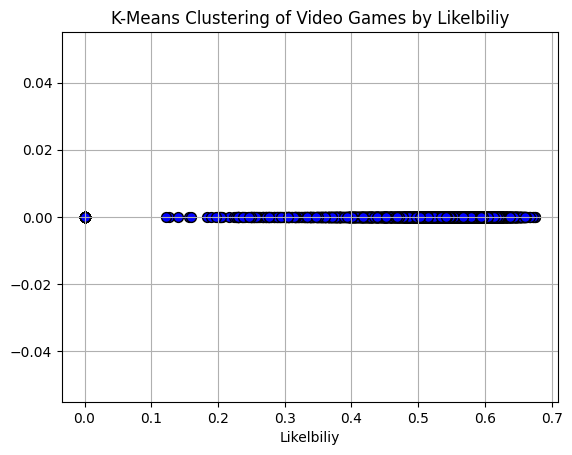

In [ ]:
X = merged_df[['likelbiliy']]
y = merged_df['genre']

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X, np.zeros_like(X), c='blue', marker='o', edgecolor='k', s=50)
plt.title('K-Means Clustering of Video Games by Likelbiliy')
plt.xlabel('Likelbiliy')
plt.ylabel('Genre')
plt.show()
